 CSV loaded successfully with custom headers.

 Preview Data:


,Time,Latitude,Longitude,Altitude,Organics,Nitrates,Sulfates,Ammonium,Chloride
0,47035,47036,178.0,37.946884,-75.455208,66.0,23.34,1010.3,53.1
1,47036,47037,178.0,37.946880,-75.455215,87.0,23.25,1010.5,53.1
2,47037,47038,178.0,37.946873,-75.455215,87.0,23.21,1008.8,53.1
3,47038,47039,178.0,37.946850,-75.455238,87.0,23.24,1009.8,53.1
4,47039,47040,178.0,37.946808,-75.455269,87.0,23.11,1009.6,53.1



 Dataset shape: (14380, 9)

 Columns: ['Time', 'Latitude', 'Longitude', 'Altitude', 'Organics', 'Nitrates', 'Sulfates', 'Ammonium', 'Chloride']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14380 entries, 0 to 14379
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       14380 non-null  int64  
 1   Latitude   14380 non-null  int64  
 2   Longitude  14380 non-null  float64
 3   Altitude   14380 non-null  float64
 4   Organics   14380 non-null  float64
 5   Nitrates   14380 non-null  float64
 6   Sulfates   14380 non-null  float64
 7   Ammonium   14380 non-null  float64
 8   Chloride   14380 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1011.2 KB
\ Duplicate rows found: 0

 Missing values per column:
Time         0
Latitude     0
Longitude    0
Altitude     0
Organics     0
Nitrates     0
Sulfates     0
Ammonium     0
Chloride     0
dtype: int64

 Summary Statistics:


,Time,Latitude,Longitude,Altitude,Organics,Nitrates,Sulfates,Ammonium,Chloride
count,14380,14380.000000,14380.0,14380.000000,14380.000000,14380.000000,14380.000000,14380.000000,14380.000000
mean,1970-01-01 00:00:00.000054224,54225.500000,178.0,37.758029,-76.306184,23043.740542,-16.539962,425.700682,31.536446
min,1970-01-01 00:00:00.000047035,47036.000000,178.0,36.872280,-77.531891,51.000000,-24.110000,356.200000,14.600000
25%,1970-01-01 00:00:00.000050629,50630.750000,178.0,37.318104,-76.900970,26004.000000,-22.620000,359.400000,20.200000
50%,1970-01-01 00:00:00.000054224,54225.500000,178.0,37.681738,-76.338310,26023.000000,-22.110000,359.500000,30.800000
75%,1970-01-01 00:00:00.000057819,57820.250000,178.0,38.154837,-75.634737,26029.000000,-21.050000,359.800000,42.300000
max,1970-01-01 00:00:00.000061414,61415.000000,178.0,38.961723,-75.274994,26241.000000,27.360000,1013.000000,53.100000
std,NaN,4151.292771,0.0,0.546774,0.671981,6842.755446,13.276229,159.770236,12.171857


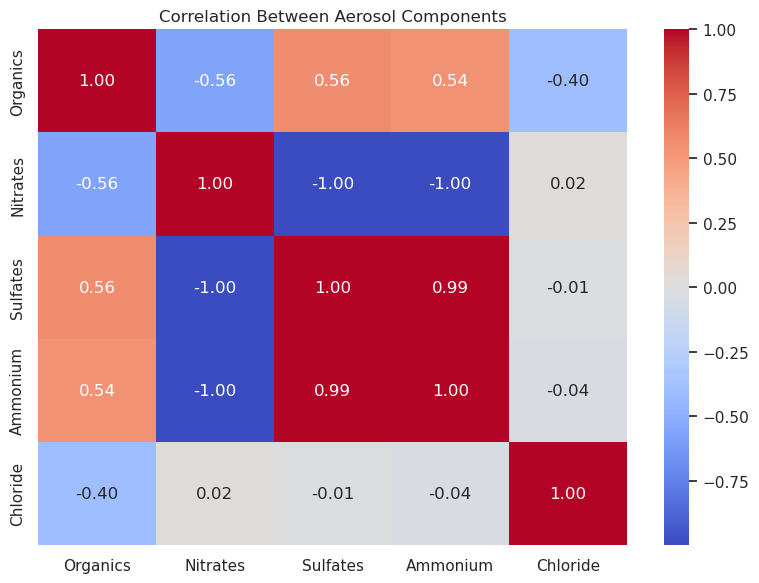

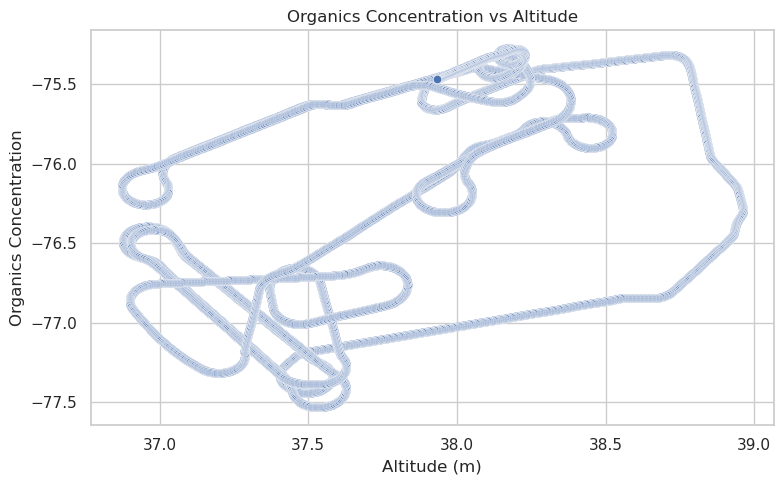

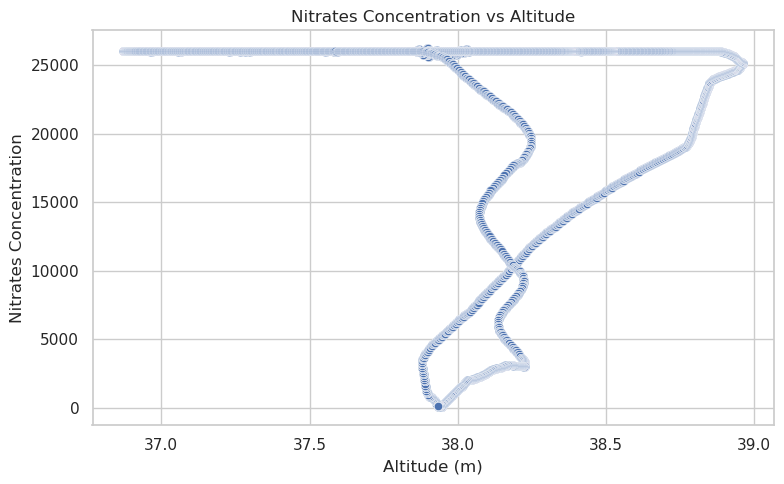

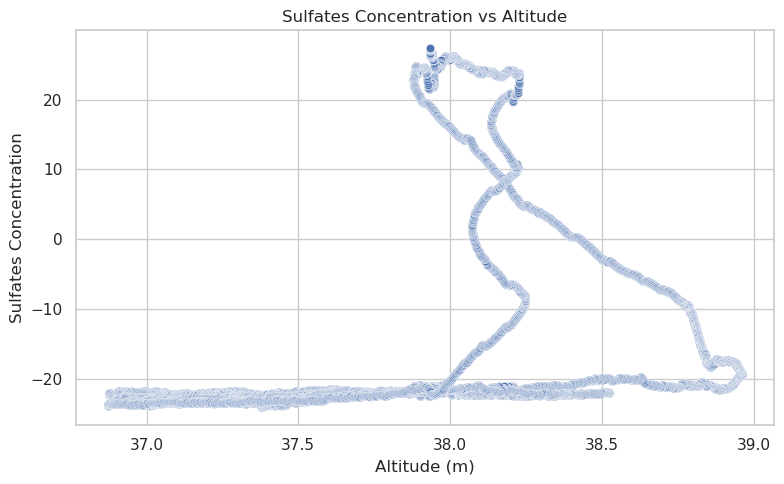

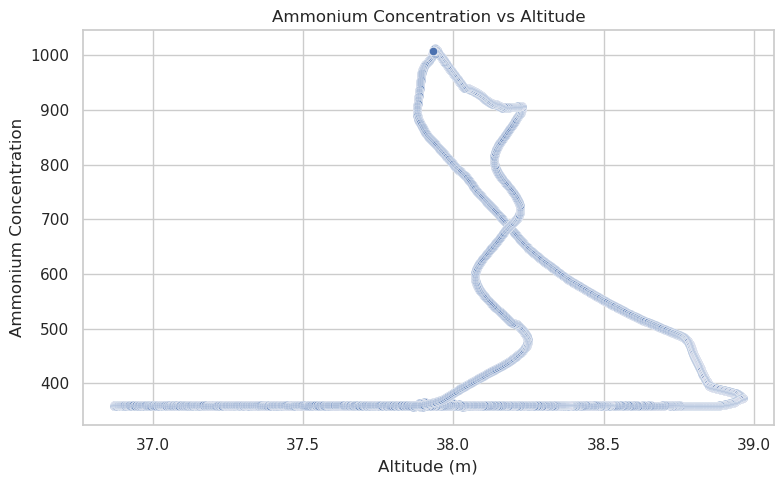

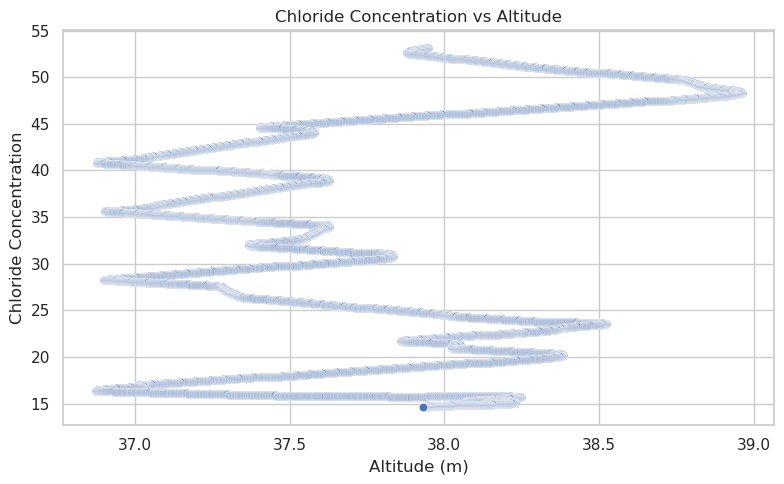

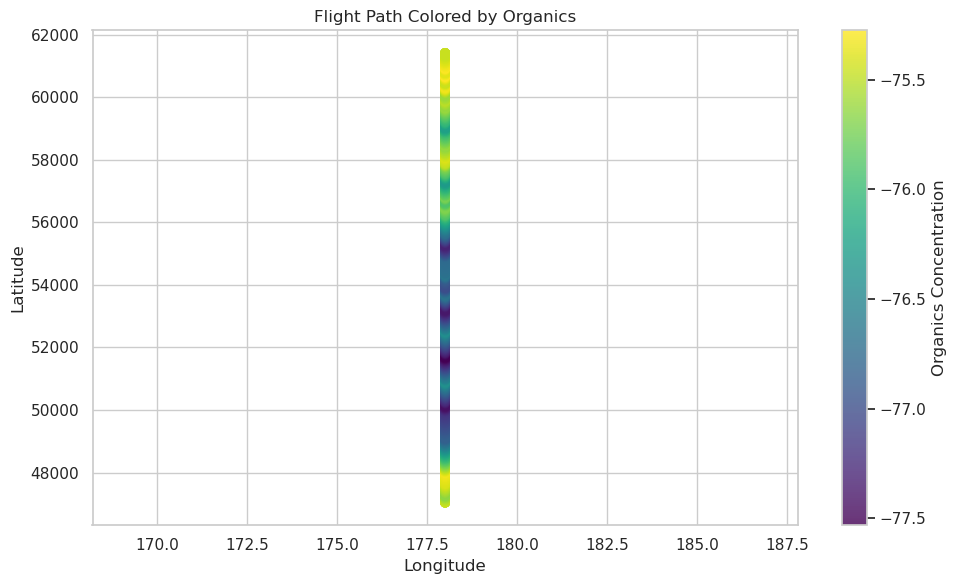

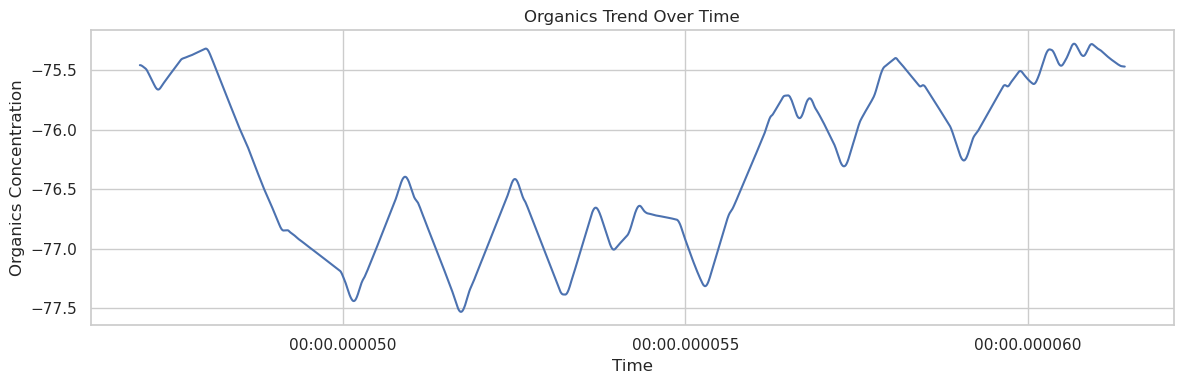

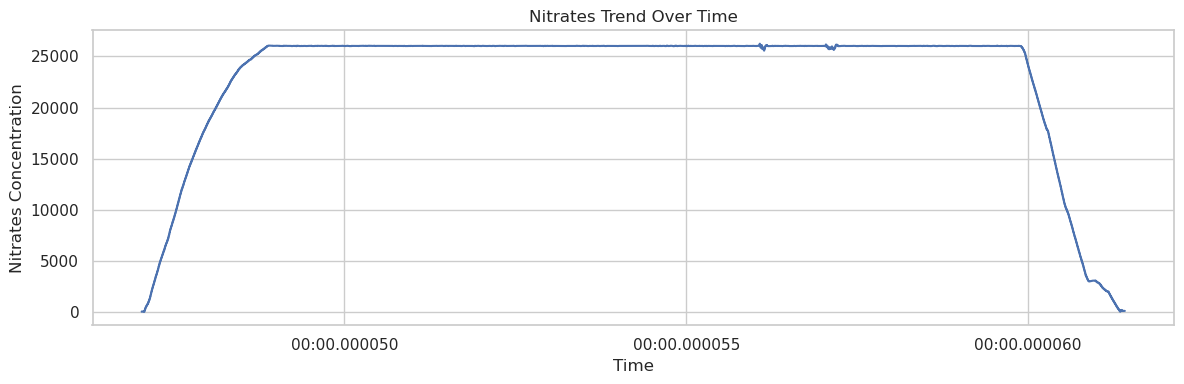

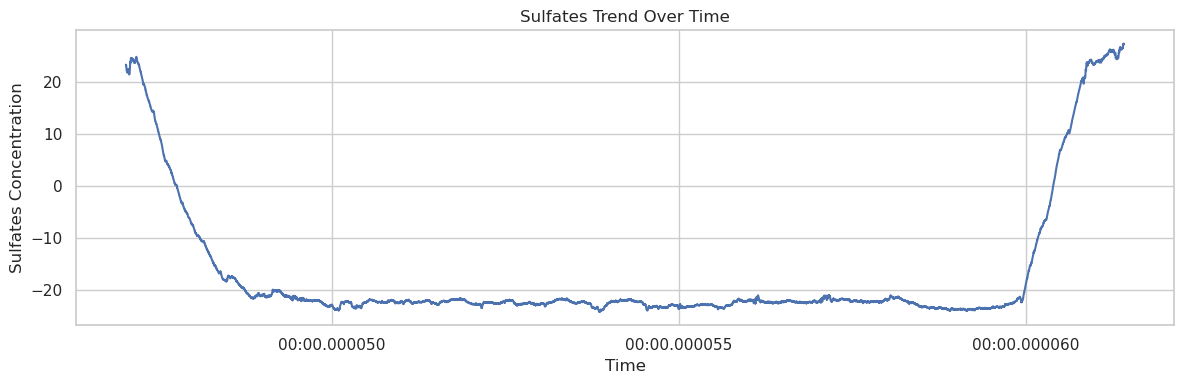

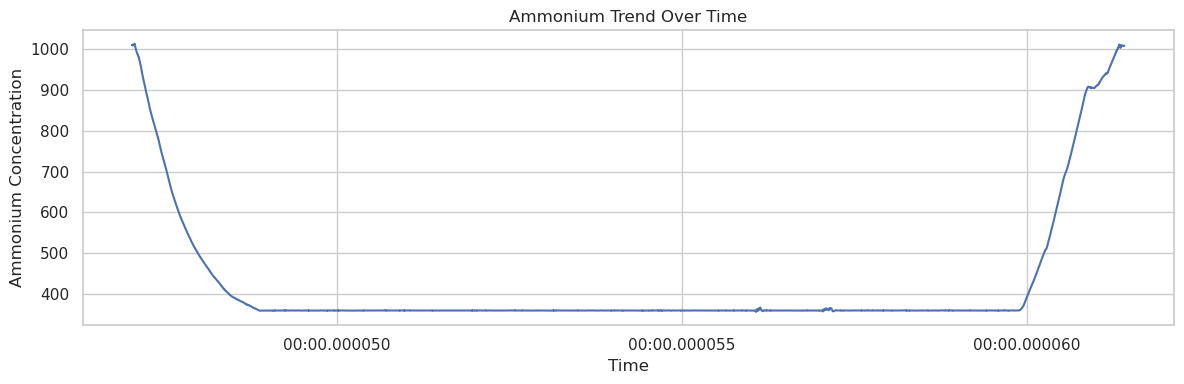

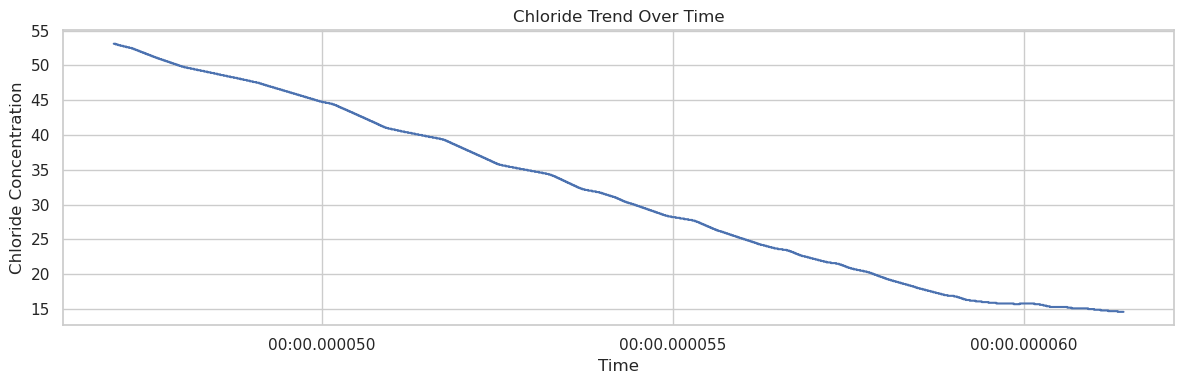

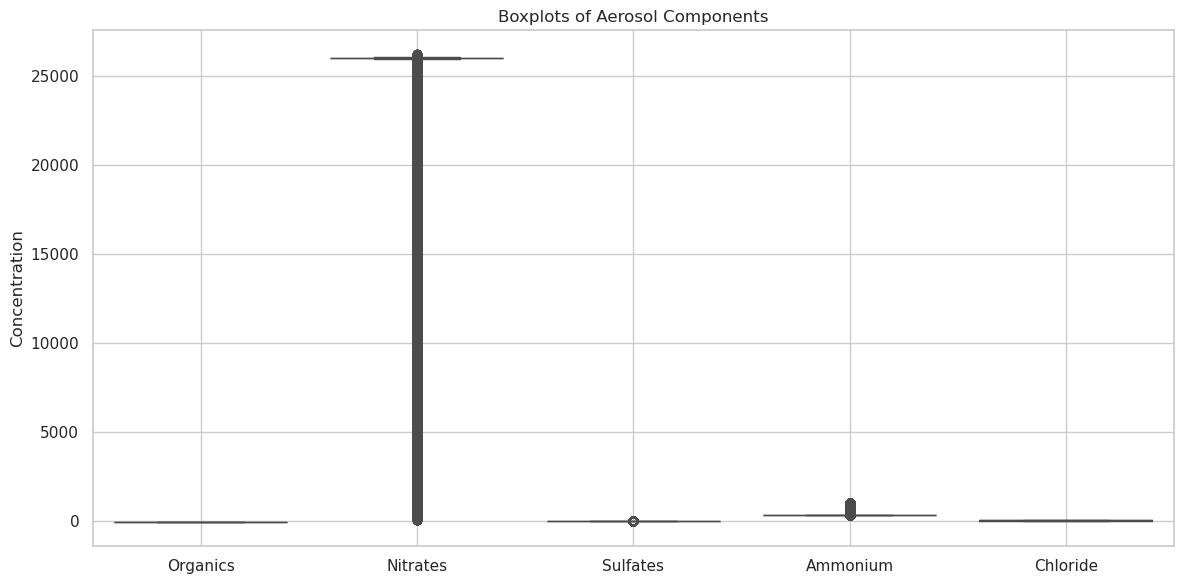

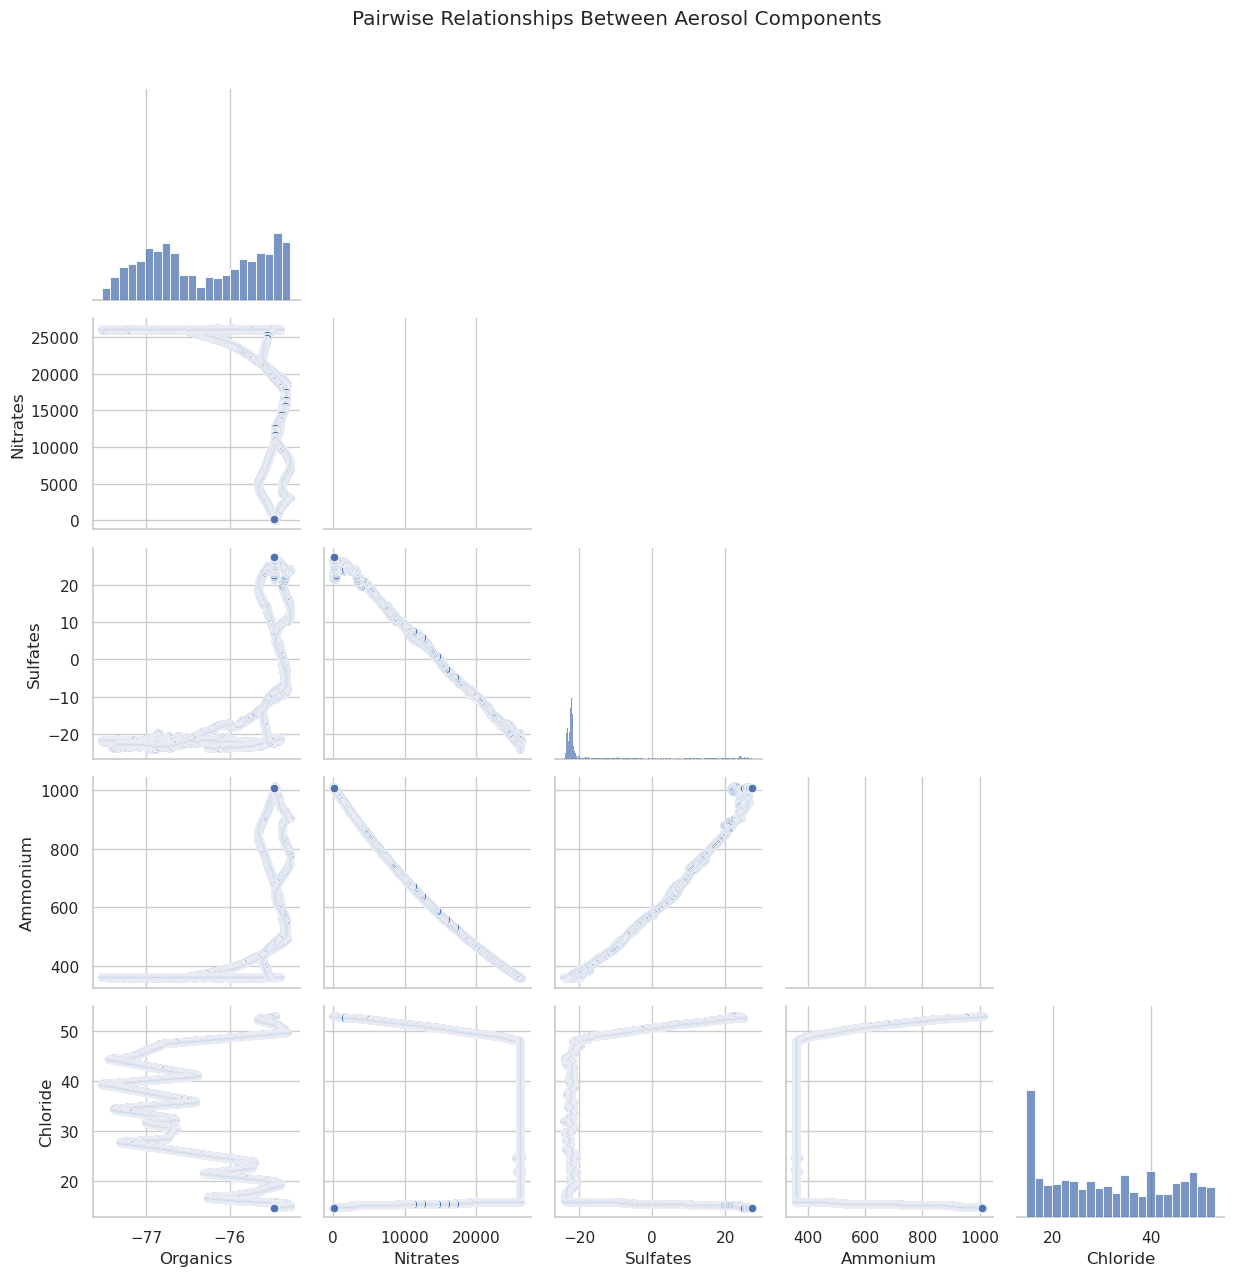

 Cleaned data saved to 'Aerosol_Cleaned_Output.csv'

 Final cleaned dataset preview:
                           Time  Latitude  Longitude   Altitude   Organics  \
0 1970-01-01 00:00:00.000047035     47036      178.0  37.946884 -75.455208   
1 1970-01-01 00:00:00.000047036     47037      178.0  37.946880 -75.455215   
2 1970-01-01 00:00:00.000047037     47038      178.0  37.946873 -75.455215   
3 1970-01-01 00:00:00.000047038     47039      178.0  37.946850 -75.455238   
4 1970-01-01 00:00:00.000047039     47040      178.0  37.946808 -75.455269   

   Nitrates  Sulfates  Ammonium  Chloride  
0      66.0     23.34    1010.3      53.1  
1      87.0     23.25    1010.5      53.1  
2      87.0     23.21    1008.8      53.1  
3      87.0     23.24    1009.8      53.1  
4      87.0     23.11    1009.6      53.1  


In [1]:

# STEP 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plotting and styling
%matplotlib inline
sns.set(style="whitegrid")


# STEP 2: Load CSV and Assign Headers

file_path = "sarp-mrg1_p3b_20240626_RA_20250709T180453.csv"
column_names = [
    'Time', 'Latitude', 'Longitude', 'Altitude',
    'Organics', 'Nitrates', 'Sulfates', 'Ammonium', 'Chloride'
]

try:
    aero_df = pd.read_csv(file_path, skiprows=46, header=None)
    aero_df = aero_df.iloc[:, :len(column_names)]
    aero_df.columns = column_names
    print(" CSV loaded successfully with custom headers.")
except Exception as e:
    raise RuntimeError(f" Failed to load or parse file: {e}")


# STEP 3: Preview Dataset

print("\n Preview Data:")
display(aero_df.head())
print("\n Dataset shape:", aero_df.shape)
print("\n Columns:", aero_df.columns.tolist())
aero_df.info()


# STEP 4: Clean Column Names & Duplicates

aero_df.columns = aero_df.columns.str.strip()
duplicate_count = aero_df.duplicated().sum()
print(f"\ Duplicate rows found: {duplicate_count}")
aero_df = aero_df.drop_duplicates()


# STEP 5: Handle Missing Values

print("\n Missing values per column:")
print(aero_df.isnull().sum())

aerosol_cols = ['Organics', 'Nitrates', 'Sulfates', 'Ammonium', 'Chloride']
aero_df = aero_df.dropna(subset=aerosol_cols, how='all')

for col in aerosol_cols:
    if aero_df[col].isnull().sum() > 0:
        median_val = aero_df[col].median()
        aero_df[col] = aero_df[col].fillna(median_val)


# STEP 6: Parse Time Column

try:
    aero_df['Time'] = pd.to_datetime(aero_df['Time'], errors='coerce')
except:
    print(" Time column could not be parsed.")


# STEP 7: Descriptive Stats

print("\n Summary Statistics:")
display(aero_df.describe())


# STEP 8: Correlation Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(aero_df[aerosol_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Aerosol Components")
plt.tight_layout()
plt.show()


# STEP 9: Aerosol vs Altitude

for col in aerosol_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Altitude', y=col, data=aero_df, alpha=0.6)
    plt.title(f"{col} Concentration vs Altitude")
    plt.xlabel("Altitude (m)")
    plt.ylabel(f"{col} Concentration")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# STEP 10: Flight Path Colored by Organics

color_var = 'Organics'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=aero_df['Longitude'],
    y=aero_df['Latitude'],
    c=aero_df[color_var],
    cmap='viridis',
    alpha=0.8
)
plt.colorbar(scatter, label=f'{color_var} Concentration')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Flight Path Colored by {color_var}")
plt.grid(True)
plt.tight_layout()
plt.show()


# STEP 11: Time-Series Trend (if Time is valid)

if aero_df['Time'].notna().all():
    for col in aerosol_cols:
        plt.figure(figsize=(12, 4))
        plt.plot(aero_df['Time'], aero_df[col], label=col)
        plt.title(f"{col} Trend Over Time")
        plt.xlabel("Time")
        plt.ylabel(f"{col} Concentration")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


# STEP 12: Boxplots for Outlier Detection

plt.figure(figsize=(12, 6))
sns.boxplot(data=aero_df[aerosol_cols])
plt.title("Boxplots of Aerosol Components")
plt.ylabel("Concentration")
plt.grid(True)
plt.tight_layout()
plt.show()


# STEP 13: Pairplot of Aerosol Variables

sns.pairplot(aero_df[aerosol_cols], corner=True)
plt.suptitle("Pairwise Relationships Between Aerosol Components", y=1.02)
plt.tight_layout()
plt.show()


# STEP 14: Save Cleaned Data

aero_df.to_csv("Aerosol_Cleaned_Output.csv", index=False)
print(" Cleaned data saved to 'Aerosol_Cleaned_Output.csv'")


# STEP 15: Display Final Frame (for Review)

print("\n Final cleaned dataset preview:")
print(aero_df.head())
